# LSTM MODEL


In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
df = pd.read_csv('/content/TATAPOWER.NS-2.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-03-18,80.385925,82.364212,79.710419,80.964935,68.884499,5771154.0
1,2014-03-19,81.250000,82.900002,79.000000,79.400002,67.553070,7037784.0
2,2014-03-20,79.300003,79.599998,77.800003,78.000000,66.361954,2053959.0
3,2014-03-21,78.750000,80.150002,78.250000,79.849998,67.935921,4279465.0
4,2014-03-22,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2462,2024-03-11,414.000000,421.500000,404.649994,413.149994,413.149994,39122073.0
2463,2024-03-12,414.399994,414.700012,395.000000,396.100006,396.100006,26812422.0
2464,2024-03-13,399.250000,399.799988,367.750000,371.950012,371.950012,36185918.0
2465,2024-03-14,371.950012,386.299988,365.549988,384.450012,384.450012,27089563.0


In [ ]:
df = df[['Date', 'Close']]
df

,Date,Close
0,2014-03-18,80.964935
1,2014-03-19,79.400002
2,2014-03-20,78.000000
3,2014-03-21,79.849998
4,2014-03-22,NaN
...,...,...
2462,2024-03-11,413.149994
2463,2024-03-12,396.100006
2464,2024-03-13,371.950012
2465,2024-03-14,384.450012


In [ ]:
df['Date']


0       2014-03-18
1       2014-03-19
2       2014-03-20
3       2014-03-21
4       2014-03-22
           ...    
2462    2024-03-11
2463    2024-03-12
2464    2024-03-13
2465    2024-03-14
2466    2024-03-15
Name: Date, Length: 2467, dtype: object

In [ ]:
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-6-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2014-03-18
1      2014-03-19
2      2014-03-20
3      2014-03-21
4      2014-03-22
          ...    
2462   2024-03-11
2463   2024-03-12
2464   2024-03-13
2465   2024-03-14
2466   2024-03-15
Name: Date, Length: 2467, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
2014-03-18,80.964935
2014-03-19,79.400002
2014-03-20,78.000000
2014-03-21,79.849998
2014-03-22,NaN
...,...
2024-03-11,413.149994
2024-03-12,396.100006
2024-03-13,371.950012


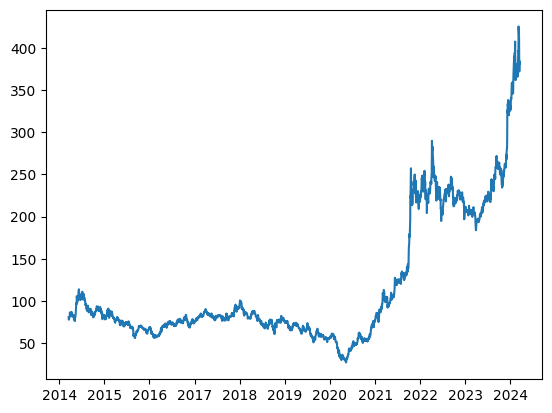

In [ ]:
plt.plot(df.index, df['Close'])

In [ ]:


def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,104.750000,104.550003,101.250000,98.650002
1,2021-03-26,104.550003,101.250000,98.650002,103.449997
2,2021-03-30,101.250000,98.650002,103.449997,103.599998
3,2021-03-31,98.650002,103.449997,103.599998,103.250000
4,2021-04-01,103.449997,103.599998,103.250000,105.050003
...,...,...,...,...,...
241,2022-03-16,233.149994,231.550003,227.399994,230.449997
242,2022-03-17,231.550003,227.399994,230.449997,231.750000
243,2022-03-21,227.399994,230.449997,231.750000,227.949997
244,2022-03-22,230.449997,231.750000,227.949997,231.399994


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((246,), (246, 3, 1), (246,))

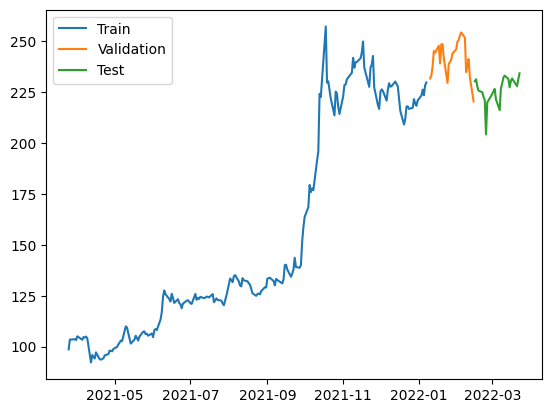

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 92ms/step - loss: 26500.4668 - mean_absolute_error: 154.4916 - val_loss: 58401.6250 - val_mean_absolute_error: 241.5269
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 26382.2559 - mean_absolute_error: 154.0972 - val_loss: 58217.6289 - val_mean_absolute_error: 241.1457
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 26264.1406 - mean_absolute_error: 153.7193 - val_loss: 58039.0898 - val_mean_absolute_error: 240.7752
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 26146.6602 - mean_absolute_error: 153.3324 - val_loss: 57852.2656 - val_mean_absolute_error: 240.3869
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 26014.3086 - mean_absolute_error: 152.9014 - val_loss: 57613.4141 - val_mean_absolute_error: 239.8896
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 25843.0410 - mean_absolute_error: 152.3404 - val_loss: 57290.9

7/7 [==============================] - 1s 4ms/step


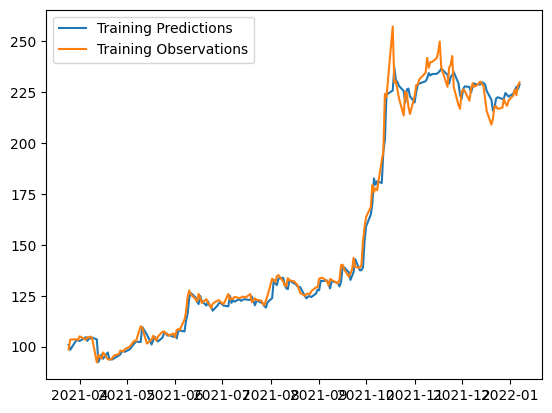

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 39ms/step


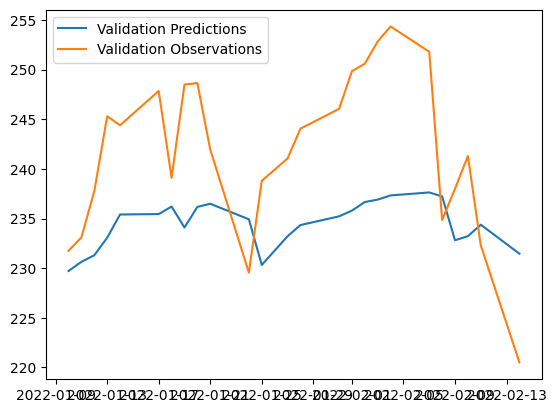

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 32ms/step


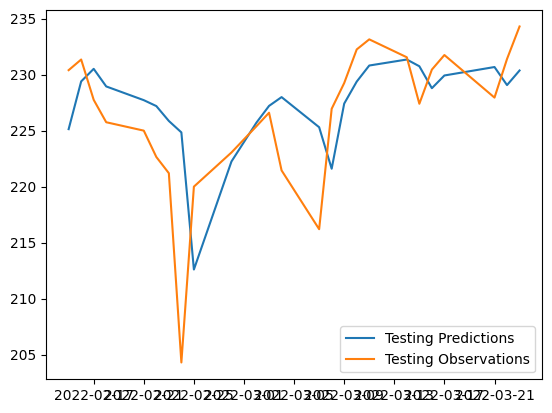

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

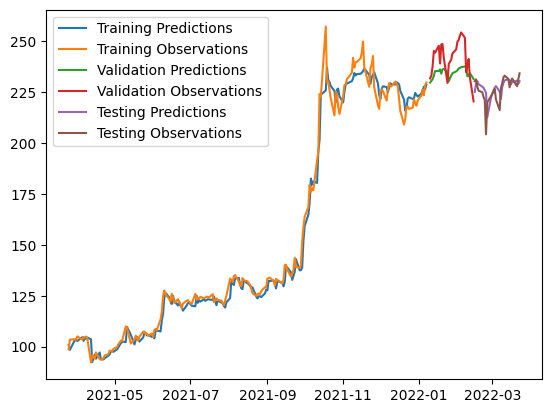

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))
print('Root mean square error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

Mean Absolute Error: 114.60415996005217
Mean Squared Error: 18869.715479871204
Root mean square error: 137.36708295611143


# LINEAR REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
import pandas as pd
path = '/content/TATAPOWER.NS-2.csv'
datadf = pd.read_csv(path)
datadf

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-03-18,80.385925,82.364212,79.710419,80.964935,68.884499,5771154.0
1,2014-03-19,81.250000,82.900002,79.000000,79.400002,67.553070,7037784.0
2,2014-03-20,79.300003,79.599998,77.800003,78.000000,66.361954,2053959.0
3,2014-03-21,78.750000,80.150002,78.250000,79.849998,67.935921,4279465.0
4,2014-03-22,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2462,2024-03-11,414.000000,421.500000,404.649994,413.149994,413.149994,39122073.0
2463,2024-03-12,414.399994,414.700012,395.000000,396.100006,396.100006,26812422.0
2464,2024-03-13,399.250000,399.799988,367.750000,371.950012,371.950012,36185918.0
2465,2024-03-14,371.950012,386.299988,365.549988,384.450012,384.450012,27089563.0


In [ ]:
df.describe()


,Close
count,2465.000000
mean,117.195402
std,76.896264
min,27.299999
25%,69.900002
50%,81.550003
75%,137.899994
max,425.250000


In [ ]:
datadf.isna().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [ ]:
datadf.fillna(datadf.mean(), inplace = True)

<ipython-input-21-c5bdab0dbe43>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  datadf.fillna(datadf.mean(), inplace = True)


In [ ]:
DA = datadf.isna().sum()

In [ ]:
x = datadf[['High','Low','Open','Volume']].values
y = datadf[['Close']].values


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(regressor.coef_)

[[ 8.23279013e-01  7.61736100e-01 -5.84925874e-01 -2.89015845e-09]]


In [ ]:
print(regressor.intercept_)

[-0.06182845]


In [ ]:
predicted = regressor.predict(x_test)


In [ ]:
dframe = pd.DataFrame({'Actual': y_test.flatten(),'Predicted': predicted.flatten()})
dframe.head(10)

,Actual,Predicted
0,72.349998,72.394568
1,74.849998,75.255837
2,122.550003,122.190081
3,83.500000,83.205837
4,57.900002,57.924947
5,49.349998,49.267714
6,204.550003,204.280832
7,236.699997,236.160215
8,68.550003,67.790463
9,252.000000,250.461731


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))
print('Root mean square error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

Mean Absolute Error: 0.6204998223243527
Mean Squared Error: 1.020005954448814
Root mean square error: 1.0099534417233371


In [ ]:
graph = dframe.head(25)

<Axes: >

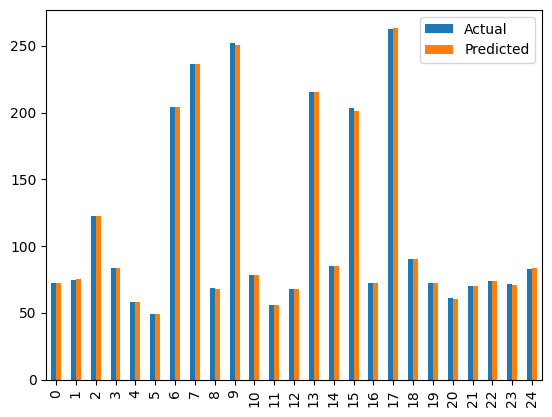

In [ ]:
graph.plot(kind = 'bar')

# ARIMA MODEL

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the historical stock price data
# Replace 'stock_data.csv' with the path to your dataset
data = pd.read_csv('/content/TATAPOWER.NS-2.csv')

In [ ]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)


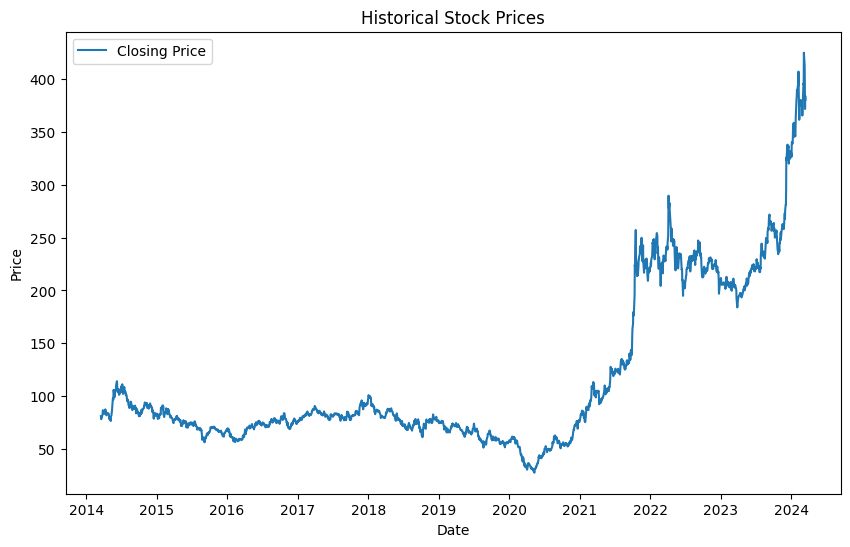

In [ ]:
# Plot the closing prices to visualize the data
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label='Closing Price')
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
# Split the data into train and test sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]


In [ ]:
# Fit the ARIMA model
model = ARIMA(train_data['Close'], order=(5,1,0))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Generate predictions
predictions = model_fit.forecast(steps=len(test_data))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Evaluate the model
mse = mean_squared_error(test_data['Close'], predictions)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 53.347843217392295


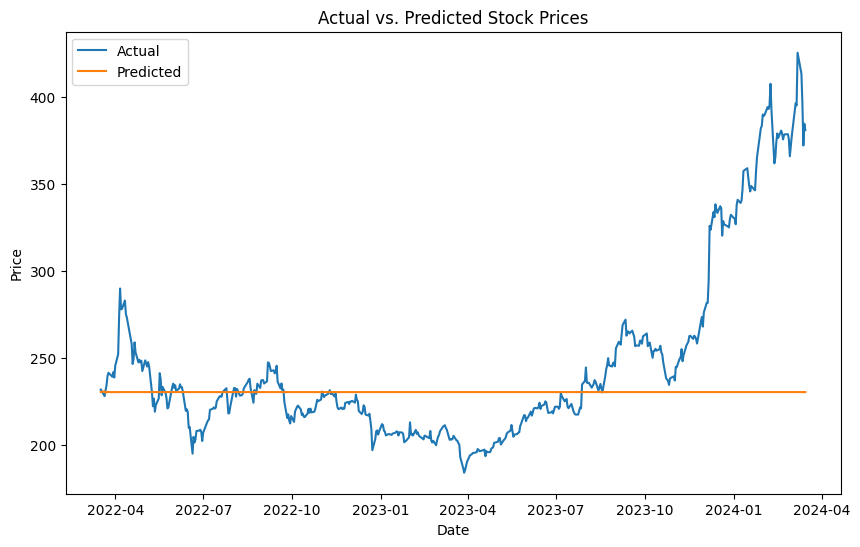

In [ ]:
# Plot the actual vs. predicted values
plt.figure(figsize=(10,6))
plt.plot(test_data.index, test_data['Close'], label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# k-Nearest Neighbours

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/TATAPOWER.NS-2.csv')

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-03-18,80.385925,82.364212,79.710419,80.964935,68.884499,5771154.0
1,2014-03-19,81.250000,82.900002,79.000000,79.400002,67.553070,7037784.0
2,2014-03-20,79.300003,79.599998,77.800003,78.000000,66.361954,2053959.0
3,2014-03-21,78.750000,80.150002,78.250000,79.849998,67.935921,4279465.0
4,2014-03-22,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2462,2024-03-11,414.000000,421.500000,404.649994,413.149994,413.149994,39122073.0
2463,2024-03-12,414.399994,414.700012,395.000000,396.100006,396.100006,26812422.0
2464,2024-03-13,399.250000,399.799988,367.750000,371.950012,371.950012,36185918.0
2465,2024-03-14,371.950012,386.299988,365.549988,384.450012,384.450012,27089563.0


In [ ]:
data.isna().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [ ]:
data.fillna(data.mean(), inplace = True)

<ipython-input-47-44cf56cedd89>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace = True)


In [ ]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train, test = data.iloc[0:train_size], data.iloc[train_size:len(data)]
train_data = train[['High','Low','Open','Volume']]
test_data = test[['High','Low','Open','Volume']].values
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
X_train, y_train = train_scaled[:, :-1], train_scaled[:, -1]
X_test, y_test = test_scaled[:, :-1], test_scaled[:, -1]

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
# Make predictions
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

In [ ]:
# Evaluate model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 0.04404091689741165
Test RMSE: 0.1020646182505454


In [ ]:
# Evaluate model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 0.04404091689741165
Test RMSE: 0.1020646182505454


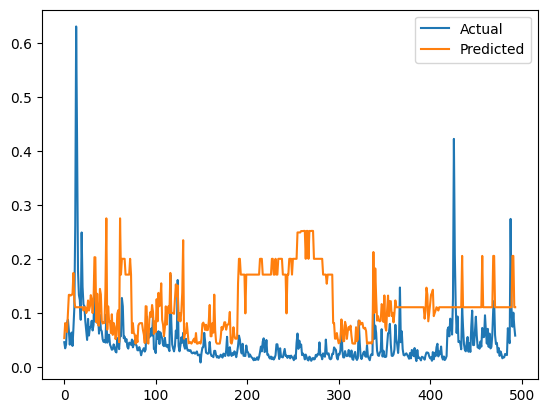

In [ ]:
# Plot predictions
plt.plot(y_test, label='Actual')
plt.plot(y_test_pred, label='Predicted')
plt.legend()
plt.show()